# Build a Bird Eye View !
1. Start making a prespective transformation for a highway image.
2. Make a bird eye view video.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

(902, 1604, 3)

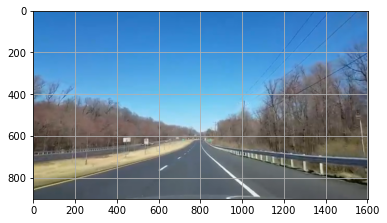

In [3]:
img=cv2.imread('highway.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.grid()
plt.imshow(img)
img.shape

__[1] Making a prespective transformation for a highway image.__

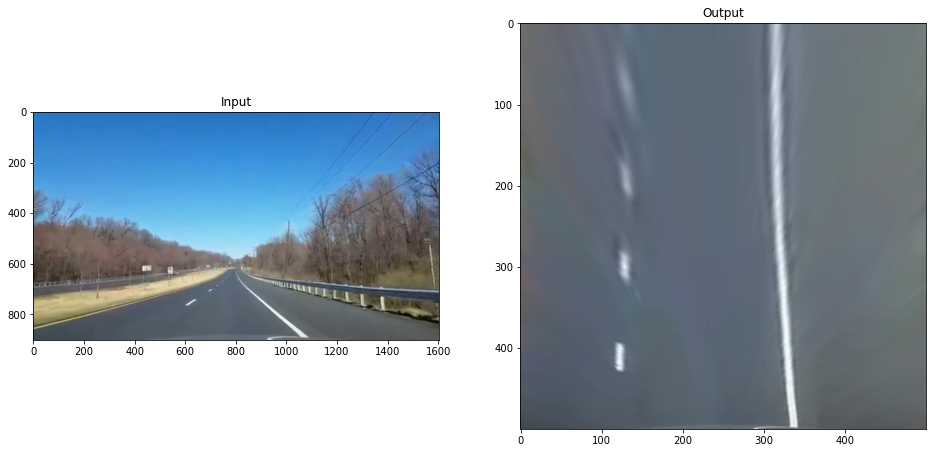

In [4]:
pts1 = np.float32([[700,670],[890,670],[20,900],[1600,900]])
pts2 = np.float32([[0,0],[500,0],[0,500],[500,500]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(500,500))
plt.figure(figsize=(16, 12))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

__[2] Make a bird eye view video.__

In [6]:
cap = cv2.VideoCapture("road.mp4")

while True:
    
    ret, frame = cap.read()
    pts1 = np.float32([[616.5,525],[654,525],[240,715],[950,715]])
    pts2 = np.float32([[0,0],[500,0],[0,500],[500,500]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(frame,M,(500,500))
    
    cv2.imshow("Frame", frame)
    cv2.imshow("dst",dst)

    if cv2.waitKey(10) & 0XFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()